In [128]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [129]:
# กำหนด Universe ของฟัซซีต่างๆ
#=====================================================================
Bright = ctrl.Antecedent(np.arange(0, 50, 1), 'Brightness')
Temp = ctrl.Antecedent(np.arange(0,50,0.5),'Temperature')
L_inten = ctrl.Consequent(np.arange(0, 50, 1), 'Light intensity')


In [130]:
 # สร้างฟังก์ชันความเป็นสมาชิกของแต่ละฟัซซี
#=====================================================================

 #  ----- ฟังก์ชั่นสามเหลี่ยม
 Bright['low'] = fuzz.trimf(Bright.universe, [0, 0, 20])
 Bright['medium'] = fuzz.trimf(Bright.universe, [10, 25, 40])
 Bright['high'] = fuzz.trimf(Bright.universe, [28, 50, 50])

#  ----- ฟังก์ชั่นาี่เหลี่ยมคางหมู
 Temp['cool'] = fuzz.trapmf(Temp.universe,[0,0,10,20])
 Temp['warm'] = fuzz.trapmf(Temp.universe,[10,20,30,40])
 Temp['hot'] = fuzz.trapmf(Temp.universe,[30,40,50,50])

#  ----- ฟังก์ชั่นสามเหลี่ยม
 L_inten['off'] = fuzz.trimf(L_inten.universe,[0, 0, 20])
 L_inten['half_on'] = fuzz.trimf(L_inten.universe,[10, 25, 40])
 L_inten['full_on'] = fuzz.trimf(L_inten.universe,[28, 50, 50])



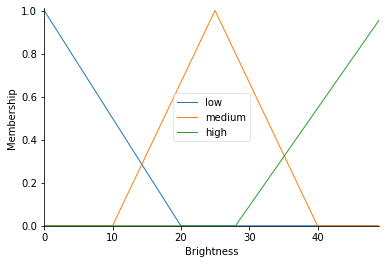

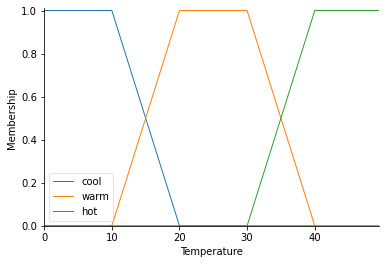

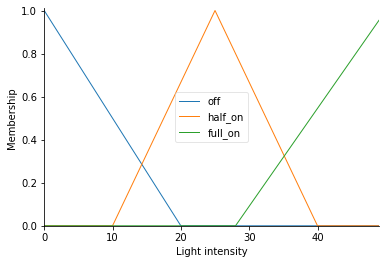

In [131]:
 # สร้างกราฟที่กำหนดความเป็นสมาชิกมาแล้ว
#=====================================================================
Bright.view()
Temp.view()
L_inten.view()


In [132]:
#สร้างกฎให้กับระบบ
#=====================================================================
rule0 = ctrl.Rule(antecedent=((Bright['low'] & Temp['cool']) |
                              (Bright['low'] & Temp['warm']) |
                              (Bright['medium'] & Temp['cool'])),
                  consequent=L_inten['full_on'], label='full_on')

rule1 = ctrl.Rule(antecedent=((Bright['low'] & Temp['hot']) |
                              (Bright['medium'] & Temp['warm']) |
                              (Bright['high'] & Temp['cool'])),
                  consequent=L_inten['half_on'], label='half_on')

rule2 = ctrl.Rule(antecedent=((Bright['medium'] & Temp['hot']) |
                              (Bright['high'] & Temp['warm']) |
                              (Bright['high'] & Temp['hot'])),
                  consequent=L_inten['off'], label='off')

# rule0 = ctrl.Rule(Bright['low'] & Temp['cool'] ,L_inten['full_on'])
# rule1 = ctrl.Rule(Bright['low'] & Temp['warm'] ,L_inten['full_on'])
# rule2 = ctrl.Rule(Bright['medium'] & Temp['cool'] ,L_inten['full_on'])

# rule3 = ctrl.Rule(Bright['low'] & Temp['hot'] ,L_inten['half_on'])
# rule4 = ctrl.Rule(Bright['medium'] & Temp['warm'] ,L_inten['half_on'])
# rule5 = ctrl.Rule(Bright['high'] & Temp['cool'] ,L_inten['half_on'])

# rule6 = ctrl.Rule(Bright['medium'] & Temp['hot'] ,L_inten['off'])
# rule7 = ctrl.Rule(Bright['high'] & Temp['warm'] ,L_inten['off'])
# rule8 = ctrl.Rule(Bright['high'] & Temp['hot'] ,L_inten['off'])

In [133]:
#สร้างระบบตามกฎฟัซซีที่กำหนดไว้
#=====================================================================
light_ctrl = ctrl.ControlSystem([rule0,rule1,rule2])
lighting = ctrl.ControlSystemSimulation(light_ctrl)

In [138]:
#ใส่อินพุตให้ระบบ
#=====================================================================
lighting.input['Brightness'] = 5
lighting.input['Temperature'] = 23

In [139]:
#วิเคราะห์อินพุตที่ได้รับมา
#=====================================================================
lighting.compute()


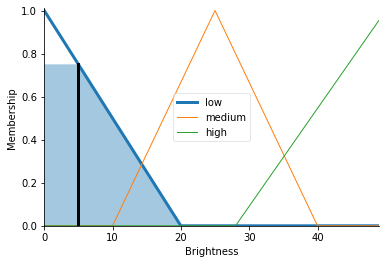

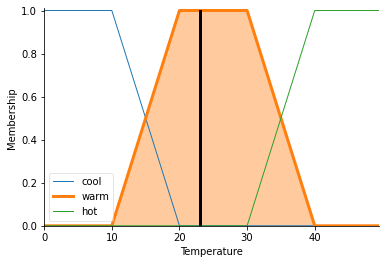

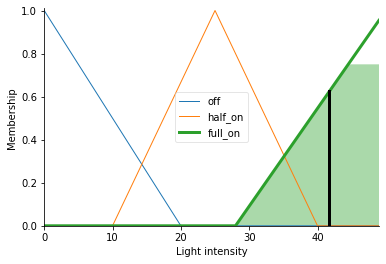

In [142]:
#วิเคราะห์อินพุตที่ได้รับมา
#=====================================================================
Bright['low'].view(sim=lighting)
Temp['warm'].view(sim=lighting)
L_inten['full_on'].view(sim=lighting)

In [143]:
#ทำการดีฟัซซีผลลัพธ์
#=====================================================================
print(lighting.output['Light intensity'])


41.73529411764706
